NAME : PRAVEEN S

Register number : 212222240078


In [2]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import utils
import pandas as pd
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras.preprocessing import image

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [4]:
X_train.shape

(60000, 28, 28)

In [5]:
X_test.shape

(10000, 28, 28)

In [6]:
single_image= X_train[0]

In [7]:
single_image.shape

(28, 28)

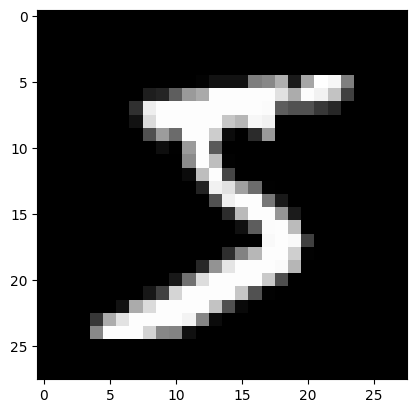

In [8]:
plt.imshow(single_image,cmap='gray')

In [9]:
y_train.shape

(60000,)

In [10]:
X_train.min()

0

In [12]:
X_train.max()

255

In [13]:
X_train_scaled = X_train/255.0
X_test_scaled = X_test/255.0

In [14]:
X_train_scaled.min()

0.0

In [15]:
X_train_scaled.max()

1.0

In [16]:
y_train[0]

5

In [17]:
y_train_onehot = utils.to_categorical(y_train,10)
y_test_onehot = utils.to_categorical(y_test,10)

In [18]:
type(y_train_onehot)

numpy.ndarray

In [19]:
y_train_onehot.shape

(60000, 10)

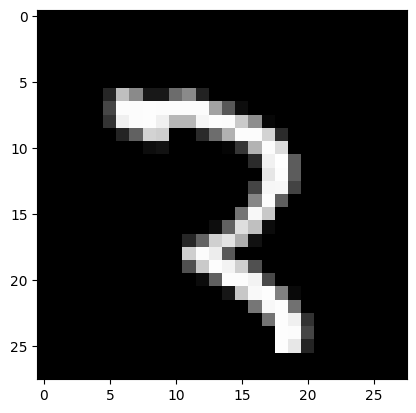

In [20]:
single_image = X_train[500]
plt.imshow(single_image,cmap='gray')

In [21]:
y_train_onehot[500]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [22]:
X_train_scaled = X_train_scaled.reshape(-1,28,28,1)
X_test_scaled = X_test_scaled.reshape(-1,28,28,1)

In [23]:
model = keras.Sequential()
model.add(layers.Input(shape=(28,28,1)))
model.add(layers.Conv2D(filters=32, kernel_size=(3,3), input_shape=(28, 28, 1), activation='relu')),
model.add(layers.MaxPool2D(pool_size=(2, 2))),
model.add(layers.Flatten()),
model.add(layers.Dense(128,activation='relu')),
model.add(layers.Dense(10, activation='softmax'))

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 128)               692352    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 693962 (2.65 MB)
Trainable params: 693962 (2.65 MB)
Non-trainable params: 0 (0.00 Byte)
____________________

In [25]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics='accuracy')

In [26]:
model.fit(X_train_scaled ,y_train_onehot, epochs=10,
          batch_size=128,
          validation_data=(X_test_scaled,y_test_onehot))

Epoch 1/10
469/469 [==============================] - 31s 64ms/step - loss: 0.2289 - accuracy: 0.9374 - val_loss: 0.0902 - val_accuracy: 0.9724
Epoch 2/10
469/469 [==============================] - 26s 56ms/step - loss: 0.0709 - accuracy: 0.9791 - val_loss: 0.0547 - val_accuracy: 0.9816
Epoch 3/10
469/469 [==============================] - 26s 55ms/step - loss: 0.0481 - accuracy: 0.9857 - val_loss: 0.0569 - val_accuracy: 0.9817
Epoch 4/10
469/469 [==============================] - 27s 58ms/step - loss: 0.0354 - accuracy: 0.9894 - val_loss: 0.0439 - val_accuracy: 0.9853
Epoch 5/10
469/469 [==============================] - 26s 55ms/step - loss: 0.0270 - accuracy: 0.9920 - val_loss: 0.0441 - val_accuracy: 0.9852
Epoch 6/10
469/469 [==============================] - 26s 55ms/step - loss: 0.0201 - accuracy: 0.9940 - val_loss: 0.0417 - val_accuracy: 0.9858
Epoch 7/10
469/469 [==============================] - 26s 55ms/step - loss: 0.0161 - accuracy: 0.9952 - val_loss: 0.0427 - val_accuracy:

In [27]:
metrics = pd.DataFrame(model.history.history)

In [28]:
metrics.head()

,loss,accuracy,val_loss,val_accuracy
0,0.228944,0.937433,0.090241,0.9724
1,0.070876,0.979100,0.054710,0.9816
2,0.048120,0.985667,0.056931,0.9817
3,0.035372,0.989367,0.043864,0.9853
4,0.026973,0.992017,0.044059,0.9852


<Axes: >

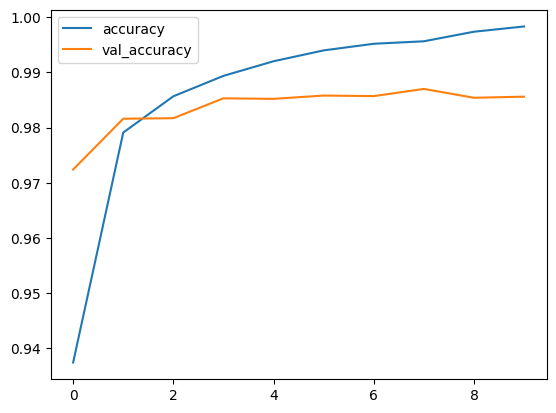

In [29]:
metrics[['accuracy','val_accuracy']].plot()

<Axes: >

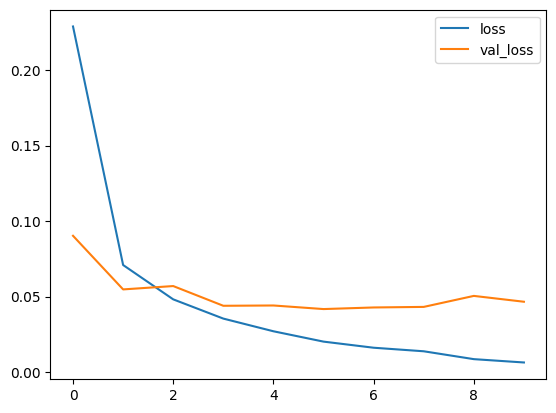

In [30]:
metrics[['loss','val_loss']].plot()

In [31]:
x_test_predictions = np.argmax(model.predict(X_test_scaled), axis=1)

313/313 [==============================] - 2s 6ms/step


In [32]:
print(confusion_matrix(y_test,x_test_predictions))

[[ 975    0    0    0    0    0    4    1    0    0]
 [   1 1130    0    0    0    0    2    1    1    0]
 [   3    4 1006    0    1    0    2   12    3    1]
 [   0    0    1  999    0    7    0    3    0    0]
 [   0    0    0    0  970    0    2    2    0    8]
 [   1    0    0    8    0  879    4    0    0    0]
 [   5    3    0    0    1    1  947    0    1    0]
 [   0    1    3    1    0    0    0 1023    0    0]
 [   5    0    4    5    0    4    1    4  946    5]
 [   2    2    0    4    5    3    0   11    1  981]]


In [33]:
print(classification_report(y_test,x_test_predictions))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.97      0.98      1032
           3       0.98      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.98      0.99      0.98       892
           6       0.98      0.99      0.99       958
           7       0.97      1.00      0.98      1028
           8       0.99      0.97      0.98       974
           9       0.99      0.97      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [38]:
img = image.load_img('/content/Screenshot 2024-03-11 083455.png')

In [39]:
type(img)

PIL.Image.Image

In [40]:
img = image.load_img('/content/Screenshot 2024-03-11 083455.png')
img_tensor = tf.convert_to_tensor(np.asarray(img))
img_28 = tf.image.resize(img_tensor,(28,28))
img_28_gray = tf.image.rgb_to_grayscale(img_28)
img_28_gray_scaled = img_28_gray.numpy()/255.0

In [41]:
x_single_prediction = np.argmax(
    model.predict(img_28_gray_scaled.reshape(1,28,28,1)),
     axis=1)

1/1 [==============================] - 0s 44ms/step


In [42]:
print(x_single_prediction)

[3]


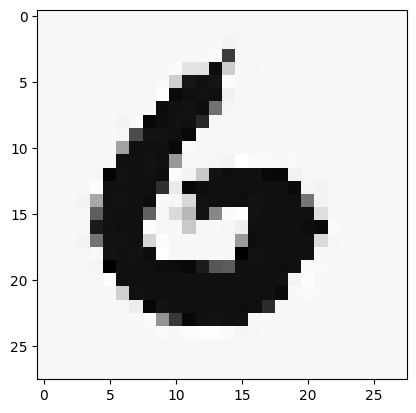

In [43]:
plt.imshow(img_28_gray_scaled.reshape(28,28),cmap='gray')

In [44]:
img_28_gray_inverted = 255.0-img_28_gray
img_28_gray_inverted_scaled = img_28_gray_inverted.numpy()/255.0

In [45]:
x_single_prediction = np.argmax(
    model.predict(img_28_gray_inverted_scaled.reshape(1,28,28,1)),
     axis=1)

1/1 [==============================] - 0s 35ms/step


In [46]:
print(x_single_prediction)

[6]
